In [34]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
import random
import numpy as np
%matplotlib inline  

### Regularized Autoencoders 

code($h$) dimension을 인풋 차원보다 작게 가지는 Undercomplete autoencoders는 데이터의 중요한 특징을 학습할 수 있지만 capacity가 너무 커지면 실패한다는 것을 보았다. 이러한 문제는 인풋 차원과 hidden을 같게 만들거나 더 크게 만드는 overcomplete에서도 나타나는 문제이다. 

이상적으로는 code dimension과 encoder, decoder의 capacity를 잘 선택하면 어떠한 오토인코더 구조도 학습할 수 있다. <strong>Regularized autoencoders</strong>도 이러한 능력을 제공한다. 인코더와 디코더를 얕게 그리고 code의 사이즈를 작게 유지하는 것 대신, regularized autoencoders는 loss function이 모델을 카피 외에도 다른 속성들을 가지도록 격려한다.

이러한 속성들은 <strong>sparcity of the representation, smallness of the derivative of the representation, and robustness to noise or to missing inputs</strong> 등이 있다. regularized autoencoder는 비선형이 될 수 있고 overcomp 

In [3]:
# Hyper Parameters 
input_size = 784
hidden_size = 256 # undercomplete !
num_epochs = 5
batch_size = 100
learning_rate = 0.01

In [4]:
# MNIST Dataset (Images and Labels)
train_dataset = dsets.MNIST(root='../../dataset/mnist', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='../../dataset/mnist', 
                           train=False, 
                           transform=transforms.ToTensor())

# Dataset Loader (Input Pipline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [5]:
class Autoencoder(nn.Module):
    def __init__(self, input_size,hidden_size):
        super(Autoencoder, self).__init__()
        self.f = nn.Linear(input_size, hidden_size)
        self.g = nn.Linear(hidden_size, input_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        h = self.sigmoid(self.f(x)) # nonlinearity 
        r = self.sigmoid(self.g(h)) # nonlinearity
        return r

In [7]:
model = Autoencoder(input_size,hidden_size)

# Loss and Optimizer
# Softmax is internally computed.
# Set parameters to be updated.
criterion = nn.MSELoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

In [10]:
# Training the Model
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()
        recon = model(images)
        loss = criterion(recon, images)
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch: [%d/%d], Step: [%d/%d], Loss: %.4f' 
                   % (epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data[0]))

Epoch: [1/5], Step: [100/600], Loss: 0.0271
Epoch: [1/5], Step: [200/600], Loss: 0.0171
Epoch: [1/5], Step: [300/600], Loss: 0.0128
Epoch: [1/5], Step: [400/600], Loss: 0.0101
Epoch: [1/5], Step: [500/600], Loss: 0.0089
Epoch: [1/5], Step: [600/600], Loss: 0.0078
Epoch: [2/5], Step: [100/600], Loss: 0.0063
Epoch: [2/5], Step: [200/600], Loss: 0.0051
Epoch: [2/5], Step: [300/600], Loss: 0.0050
Epoch: [2/5], Step: [400/600], Loss: 0.0045
Epoch: [2/5], Step: [500/600], Loss: 0.0039
Epoch: [2/5], Step: [600/600], Loss: 0.0041
Epoch: [3/5], Step: [100/600], Loss: 0.0036
Epoch: [3/5], Step: [200/600], Loss: 0.0035
Epoch: [3/5], Step: [300/600], Loss: 0.0032
Epoch: [3/5], Step: [400/600], Loss: 0.0024
Epoch: [3/5], Step: [500/600], Loss: 0.0031
Epoch: [3/5], Step: [600/600], Loss: 0.0026
Epoch: [4/5], Step: [100/600], Loss: 0.0027
Epoch: [4/5], Step: [200/600], Loss: 0.0027
Epoch: [4/5], Step: [300/600], Loss: 0.0024
Epoch: [4/5], Step: [400/600], Loss: 0.0022
Epoch: [4/5], Step: [500/600], L

### test 

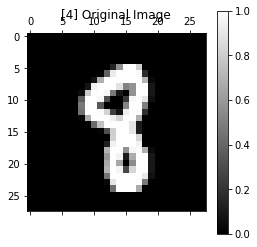

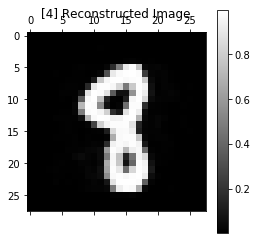

In [50]:
index = random.choice(range(10000))
test = test_dataset[index][0]

plt.matshow(np.reshape(test.numpy(), (28, 28)), cmap=plt.get_cmap('gray'))
plt.title("[" + str(epoch) + "] Original Image")
plt.colorbar()
plt.show()

recon = model(Variable(test.view(-1,28*28)))

plt.matshow(np.reshape(recon.data.numpy(), (28, 28)), cmap=plt.get_cmap('gray'))
plt.title("[" + str(epoch) + "] Reconstructed Image")
plt.colorbar()
plt.show()